In [1]:
import torch
import numpy as np

In [11]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [2]:
def model(t_u, w, b):
  return w*t_u+b

In [13]:
def loss_fn(t_p, t_c):
  squred_diffs = (t_p-t_c)**2
  return squred_diffs.mean()

In [17]:
params = torch.tensor([1.0,0.0], requires_grad=True)

In [18]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [19]:
params.grad

tensor([4517.2969,   82.6000])

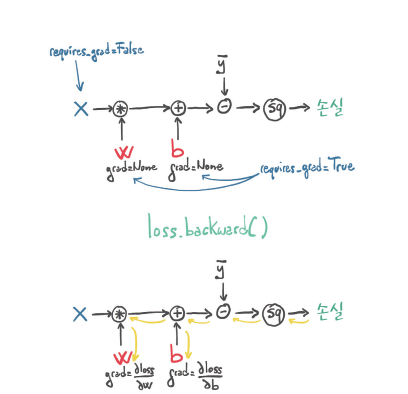

In [22]:
if params.grad is not None:
  params.grad.zero_()    

In [23]:
params.grad

tensor([0., 0.])

In [30]:
# 자동미분을 적용한 훈련 코드
n_epochs = 10
learning_rate = 0.01
def training_loop(n_epoch, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epoch+1):
    if params.grad is not None:  # backward 호출전에 적용
      params.grad.zero_()
    
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
    loss.backward()

    with torch.no_grad():
      params -= learning_rate*params.grad # 파라메터 조정    
    if epoch % 500 == 0:
      print(f"epoch:{epoch} loss : {float(loss)}")
  return params


In [35]:
training_loop(n_epoch=5000,learning_rate=0.01,params = torch.tensor([1.0,0.0], requires_grad=True),
    t_u=t_un, t_c=t_c)  # 마지막 t_u 를 정규화 하지 않으면 큰 값이 나와서 nan이 된다.

epoch:500 loss : 7.860115051269531
epoch:1000 loss : 3.828537940979004
epoch:1500 loss : 3.092191219329834
epoch:2000 loss : 2.957697868347168
epoch:2500 loss : 2.933133840560913
epoch:3000 loss : 2.9286484718322754
epoch:3500 loss : 2.9278297424316406
epoch:4000 loss : 2.9276793003082275
epoch:4500 loss : 2.927651882171631
epoch:5000 loss : 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [36]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

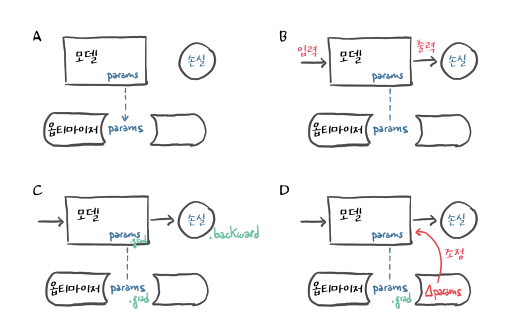

In [37]:
# 옵티마이져는 zero_grad() 와 step 이라는 두가지 메소드를 제공 
# zero_grad는 옵티마이저생성자에 전달된 파라미터의 모든 grad 속성을 0으로 만든다
# step은 옵티마이져별로 구현된 최적화 전략에 따라서 파라미터 값을 조정

In [38]:
# 경사하강 옵티마이저
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr = learning_rate)

In [39]:
t_p = model(t_u,*params)
loss = loss_fn(t_p,t_c)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [40]:
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)

t_p = model(t_un,*params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [44]:
# 자동미분 옵티마이저를 적용한 훈련 코드
def training_loop(n_epoch, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epoch+1):        
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
      print(f"epoch:{epoch} loss : {float(loss)}")
  return params

In [45]:
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epoch=5000, optimizer=optimizer, params=params, t_u = t_un, t_c= t_c)

epoch:500 loss : 7.860119819641113
epoch:1000 loss : 3.828537940979004
epoch:1500 loss : 3.092191219329834
epoch:2000 loss : 2.957697868347168
epoch:2500 loss : 2.933133840560913
epoch:3000 loss : 2.9286484718322754
epoch:3500 loss : 2.9278297424316406
epoch:4000 loss : 2.9276793003082275
epoch:4500 loss : 2.927651882171631
epoch:5000 loss : 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [46]:
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(n_epoch=5000, optimizer=optimizer, params=params, t_u = t_un, t_c= t_c)

epoch:500 loss : 2.927645206451416
epoch:1000 loss : 2.927645206451416
epoch:1500 loss : 2.927645206451416
epoch:2000 loss : 2.927645683288574
epoch:2500 loss : 2.927644968032837
epoch:3000 loss : 2.927645206451416
epoch:3500 loss : 2.9276459217071533
epoch:4000 loss : 2.9276702404022217
epoch:4500 loss : 2.9276463985443115
epoch:5000 loss : 2.9276459217071533


tensor([  5.3677, -17.3048], requires_grad=True)

In [53]:
# randperm함수
n_samples = t_u.shape[0]
n_val = int(0.2*n_samples)
shuffled_indices =  torch.randperm(n_samples)

train_indicies = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indicies, val_indices

(tensor([2, 8, 3, 1, 0, 6, 4, 9, 7]), tensor([ 5, 10]))

In [54]:
# 훈련셋, 검증셋
train_t_u = t_u[train_indicies]
train_t_c = t_c[train_indicies]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1*train_t_u
val_t_un = 0.1*val_t_u

In [61]:
# 자동미분 옵티마이저를 적용한 훈련 코드
# 과적합 여부를 판단하기 위해서 검증셋에 대한 손실 값을 계산
def training_loop(n_epoch, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epoch+1):        
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p,train_t_c)

    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p,val_t_c)

    optimizer.zero_grad()    
    train_loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
      print(f"epoch:{epoch} train loss : {float(train_loss)} validation loss : {float(val_loss)}")
  return params

In [62]:
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epoch=8000, optimizer=optimizer, params=params
              , train_t_u=train_t_u, val_t_u=val_t_u, train_t_c=train_t_c, val_t_c=val_t_c)

epoch:500 train loss : 30.70604705810547 validation loss : 20.062545776367188
epoch:1000 train loss : 30.160552978515625 validation loss : 19.79499053955078
epoch:1500 train loss : 29.62586212158203 validation loss : 19.53186798095703
epoch:2000 train loss : 29.10174560546875 validation loss : 19.273103713989258
epoch:2500 train loss : 28.5880126953125 validation loss : 19.018613815307617
epoch:3000 train loss : 28.084449768066406 validation loss : 18.768312454223633
epoch:3500 train loss : 27.590858459472656 validation loss : 18.522132873535156
epoch:4000 train loss : 27.107040405273438 validation loss : 18.280029296875
epoch:4500 train loss : 26.632802963256836 validation loss : 18.041889190673828
epoch:5000 train loss : 26.167945861816406 validation loss : 17.80765151977539
epoch:5500 train loss : 25.712299346923828 validation loss : 17.577251434326172
epoch:6000 train loss : 25.265670776367188 validation loss : 17.350631713867188
epoch:6500 train loss : 24.82788848876953 validation

tensor([ 0.2691, -2.4922], requires_grad=True)